In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [32]:
os.chdir('./')

# small dataset

In [46]:
# with stopwords and proper nouns removed
df = pd.read_csv('data/who_wrote_this_corpus_small_tokenized.csv', sep =',')

In [47]:
len(df)

7800

In [34]:
df.columns

Index(['paragraph', 'author', 'tokenized'], dtype='object')

In [39]:
documents =df.tokenized

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)
model = KMeans(n_clusters=8, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=8, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
df['cluster'] = model.predict(X)
df_cluster_author = df.groupby(['cluster','author']).size().reset_index()
df_cluster_author = df_cluster_author.pivot(index='cluster', columns='author', values=0)
df_cluster_author = df_cluster_author
df_cluster_author =  (df_cluster_author / df_cluster_author.sum())

<Figure size 432x288 with 0 Axes>

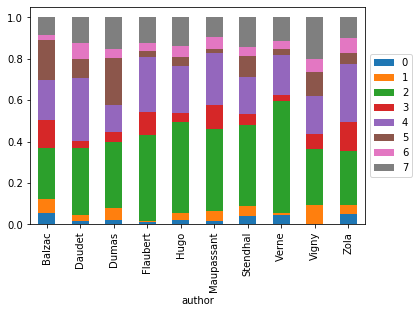

In [41]:
f = plt.figure()
df_cluster_author.T.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# big dataset

In [48]:
# with stopwords and proper nouns removed
df = pd.read_csv('data/who_wrote_this_corpus_complete_tokenized.csv', sep =',')

In [49]:
len(df)

64247

In [50]:
df.columns

Index(['paragraph', 'author', 'tokenized'], dtype='object')

In [54]:
documents =df.tokenized

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)
model = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
df['cluster'] = model.predict(X)
df_cluster_author = df.groupby(['cluster','author']).size().reset_index()
df_cluster_author = df_cluster_author.pivot(index='cluster', columns='author', values=0)
df_cluster_author = df_cluster_author
df_cluster_author =  (df_cluster_author / df_cluster_author.sum())

<Figure size 432x288 with 0 Axes>

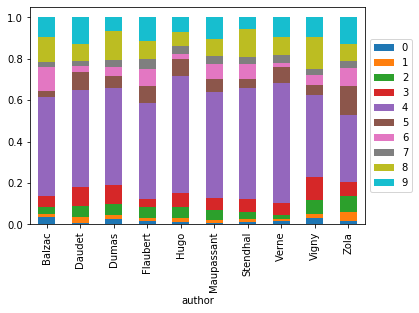

In [56]:
f = plt.figure()
df_cluster_author.T.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [57]:
## remove biggest cluster

In [59]:
df_2 = df[df['cluster'] != 4]

In [61]:
df_cluster_author = df_2.groupby(['cluster','author']).size().reset_index()
df_cluster_author = df_cluster_author.pivot(index='cluster', columns='author', values=0)
df_cluster_author = df_cluster_author
df_cluster_author =  (df_cluster_author / df_cluster_author.sum())

<Figure size 432x288 with 0 Axes>

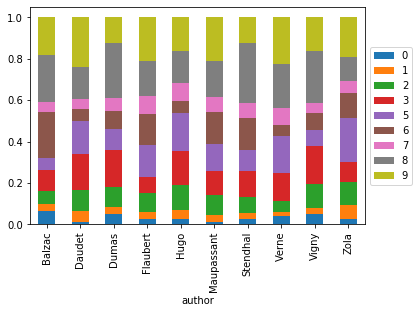

In [62]:
f = plt.figure()
df_cluster_author.T.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()